## Exploratory Data Analysis of the H1B data set --- (2011 to 2016)  ##

https://www.kaggle.com/nsharan/h-1b-visa ***Source of data ***

### Context :  ###

H-1B visas are a category of employment-based, non-immigrant visas for temporary foreign workers in the United States. For a foreign national to apply for H1-B visa, a US employer must offer them a job and submit a petition for a H-1B visa to the US immigration department. This is also the most common visa status applied for and held by international students once they complete college or higher education and begin working in a full-time position.

The following articles contain more information about the H-1B visa process:

    

### Overview of Data ###

This dataset contains five year's worth of H-1B petition data, with approximately 3 million records overall. The columns in the dataset include case status, employer name, worksite coordinates, job title, prevailing wage, occupation code, and year filed.

In [259]:
import numpy as np
import matplotlib
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

### Reading and cleaning the Data ##


First let us begin  with reading and cleaning  the data.
<br>
The  column unnamed 0  is removed. 
1. Drop the rows having na values and remove high value outliers 
2. We would analyse the data as 2 sets Certified cases and denied cases 
3. Observing the head and the info of the data Frame we see that data has 2877765 rows and is summarised as below 

    Data columns (total 10 columns):
 **  Column              Non-Null Count    Dtype ** 
 
 -   CASE_STATUS         2877765 non-null  object 
 -   EMPLOYER_NAME       2877765 non-null  object 
 -   SOC_NAME            2877765 non-null  object 
 -   JOB_TITLE           2877765 non-null  object 
 -   FULL_TIME_POSITION  2877765 non-null  object 
 -   PREVAILING_WAGE     2877765 non-null  float64
 -   YEAR                2877765 non-null  float64
 -   WORKSITE            2877765 non-null  object 
 -   lon                 2877765 non-null  float64
 -   lat                 2877765 non-null  float64
dtypes: float64(4), object(6)
memory usage: 241.5+ MB


    
    

In [260]:
df = pd.read_csv('h1b_kaggle.csv')
df = df.dropna(axis=0)
df.drop('Unnamed: 0',inplace=True ,axis=1)
# Do Some cleaning to remove duplicates with different cases
df['EMPLOYER_NAME'] = df['EMPLOYER_NAME'].apply(lambda x : x.upper())
df['SOC_NAME']= df['SOC_NAME'].apply(lambda x : x.title())
df['JOB_TITLE']= df['JOB_TITLE'].apply(lambda x : x.title())
df['FULL_TIME_POSITION'] = df['FULL_TIME_POSITION'].apply(lambda x : x.upper())
df['WORKSITE'] = df['WORKSITE'].apply(lambda x : x.title())


In [261]:
df.head(5)

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,Biochemists And Biophysicists,Postdoctoral Research Fellow,N,36067.0,2016.0,"Ann Arbor, Michigan",-83.743038,42.280826
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",Chief Executives,Chief Operating Officer,Y,242674.0,2016.0,"Plano, Texas",-96.698886,33.019843
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",Chief Executives,Chief Process Officer,Y,193066.0,2016.0,"Jersey City, New Jersey",-74.077642,40.728158
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",Chief Executives,"Regional Presiden, Americas",Y,220314.0,2016.0,"Denver, Colorado",-104.990251,39.739236
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,Chief Executives,President Mongolia And India,Y,157518.4,2016.0,"St. Louis, Missouri",-90.199404,38.627003


In [262]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2877765 entries, 0 to 3002444
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   CASE_STATUS         2877765 non-null  object 
 1   EMPLOYER_NAME       2877765 non-null  object 
 2   SOC_NAME            2877765 non-null  object 
 3   JOB_TITLE           2877765 non-null  object 
 4   FULL_TIME_POSITION  2877765 non-null  object 
 5   PREVAILING_WAGE     2877765 non-null  float64
 6   YEAR                2877765 non-null  float64
 7   WORKSITE            2877765 non-null  object 
 8   lon                 2877765 non-null  float64
 9   lat                 2877765 non-null  float64
dtypes: float64(4), object(6)
memory usage: 241.5+ MB


In [263]:
total_certified_cases = df[df['CASE_STATUS']=='CERTIFIED']
certified_cases = total_certified_cases[total_certified_cases['PREVAILING_WAGE']<150000]

In [264]:
certified_cases.head(3)

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
22,CERTIFIED,"LOMICS, LLC",Chief Executives,Ceo,Y,99986.00,2016.0,"San Diego, California",-117.161084,32.715738
23,CERTIFIED,UC UNIVERSITY HIGH SCHOOL EDUCATION INC.,Chief Executives,Chief Financial Officer,Y,99986.00,2016.0,"Chula Vista, California",-117.084196,32.640054
29,CERTIFIED,"PERSPECTIVES OF FREEDOM FOUNDATION, INC",Chief Executives,Executive Director,Y,95295.98,2016.0,"Weston, Florida",-80.399775,26.100365


### Exploring Wage Distribution for Certified Cases ###

We  get the certified cases and remove very high and very low outliers . Plot the count of certfied cases against the wages we conclude the below
- There are wages varying between 20K per annum to 150K per annum
- Most of them get in the salary bracket of 55k to 70K
- The data is not normally distributed about the peak ,but a little more towards higher end

Text(0.5, 1.0, 'WAGE DISTRIBUTION BETWEEN 2011 TO 2016')

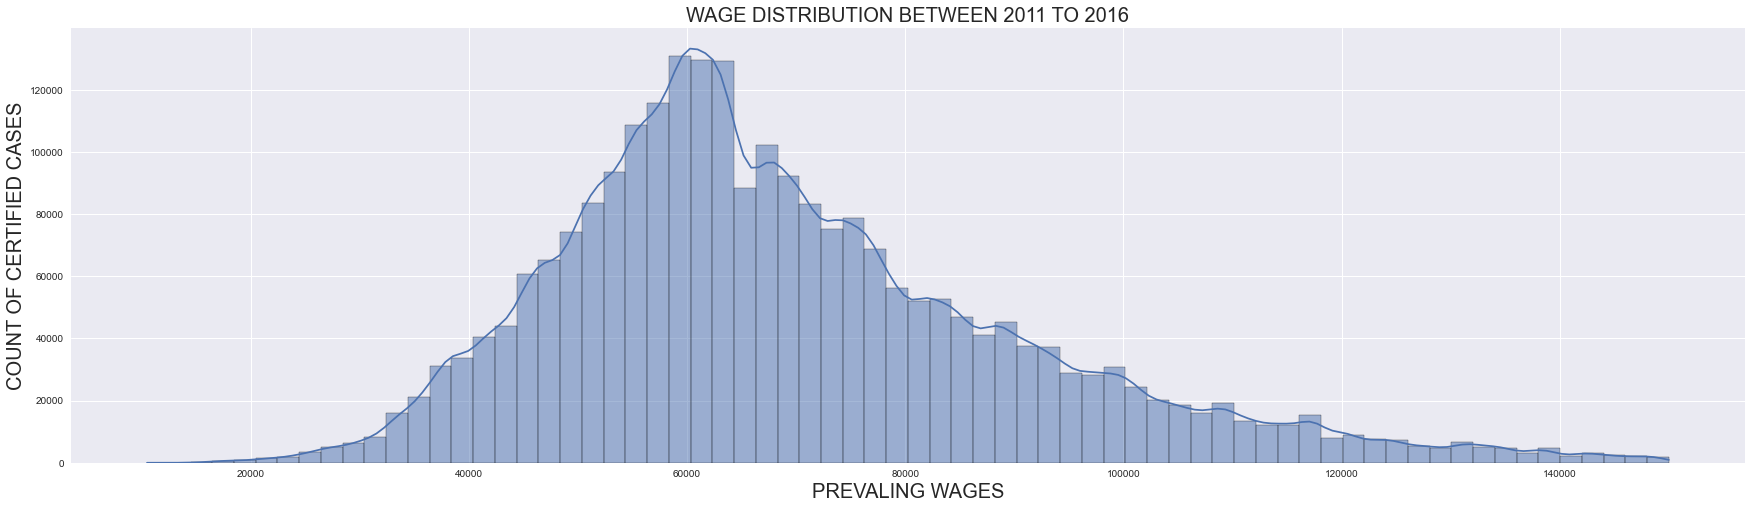

In [265]:
plt.figure(figsize=(30,8))
sns.histplot(certified_cases['PREVAILING_WAGE'],edgecolor='black',bins=70,kde=True)
plt.xlabel('PREVALING WAGES',size=20)
plt.ylabel('COUNT OF CERTIFIED CASES', size=20)
plt.title('WAGE DISTRIBUTION BETWEEN 2011 TO 2016',size=20)

### H1B Count Over Years ###

We Observe a gradual increase in the count of certified H1b applications from the period of 2011 to 2016 . This indicates  that demand of specialized skills was on the rise in the US. It would be interesting to see if we have data beyond 2016 and see if Trump policies has caused any decline in this 

<AxesSubplot:xlabel='YEAR', ylabel='CASE_STATUS'>

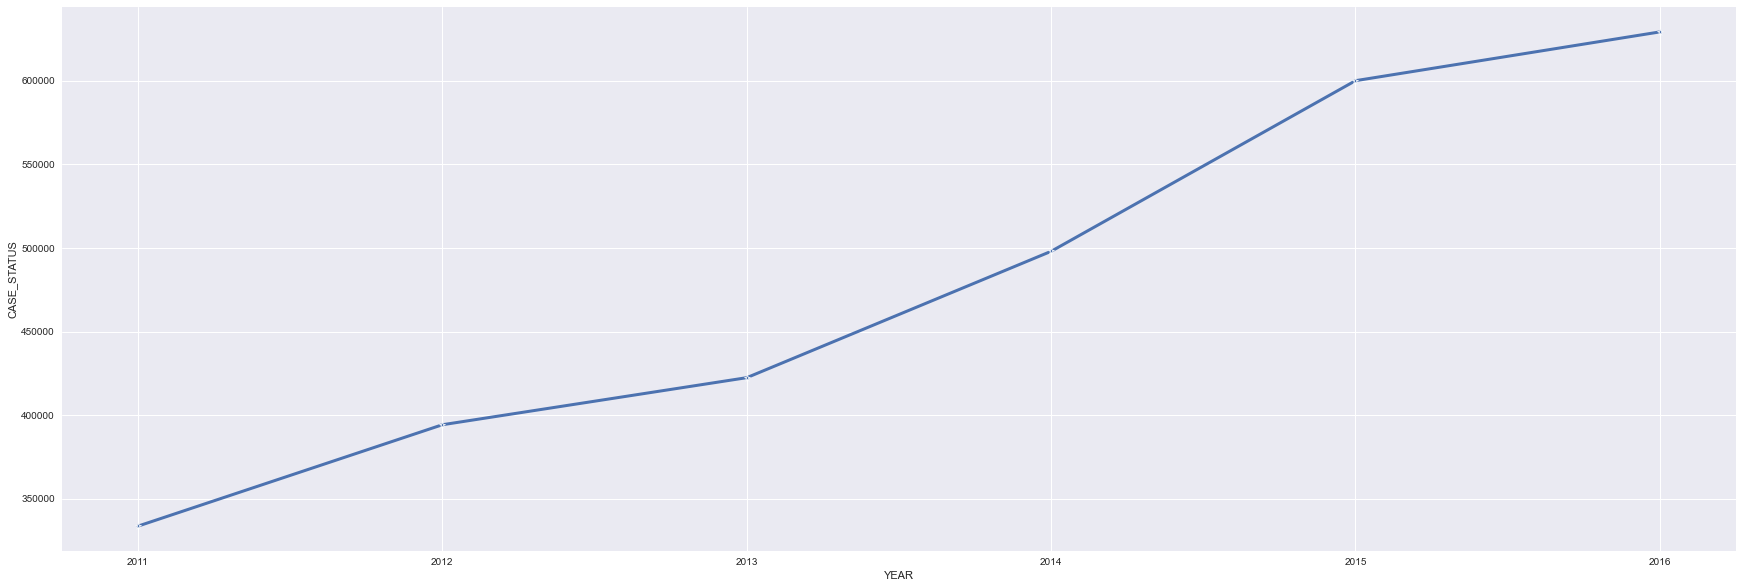

In [266]:
yearwise = df.groupby('YEAR').count()
plt.figure(figsize=(30,10))
sns.lineplot(data=yearwise['CASE_STATUS'],linewidth=3, marker='*')

### Who are the main benificiaries of H1B ###

Below represents as to who are the main  benificaries of H1B. It is predominately dominated by Indian IT companies. 
- The below table represents the count and a graphical representation of the same


In [267]:
top_twenty=certified_cases['EMPLOYER_NAME'].value_counts()[:20]
top_twenty.to_frame()

,EMPLOYER_NAME
INFOSYS LIMITED,129572
TATA CONSULTANCY SERVICES LIMITED,63801
WIPRO LIMITED,41170
DELOITTE CONSULTING LLP,35350
ACCENTURE LLP,32598
IBM INDIA PRIVATE LIMITED,27290
MICROSOFT CORPORATION,22267
"HCL AMERICA, INC.",22024
ERNST & YOUNG U.S. LLP,17724
CAPGEMINI AMERICA INC,15603


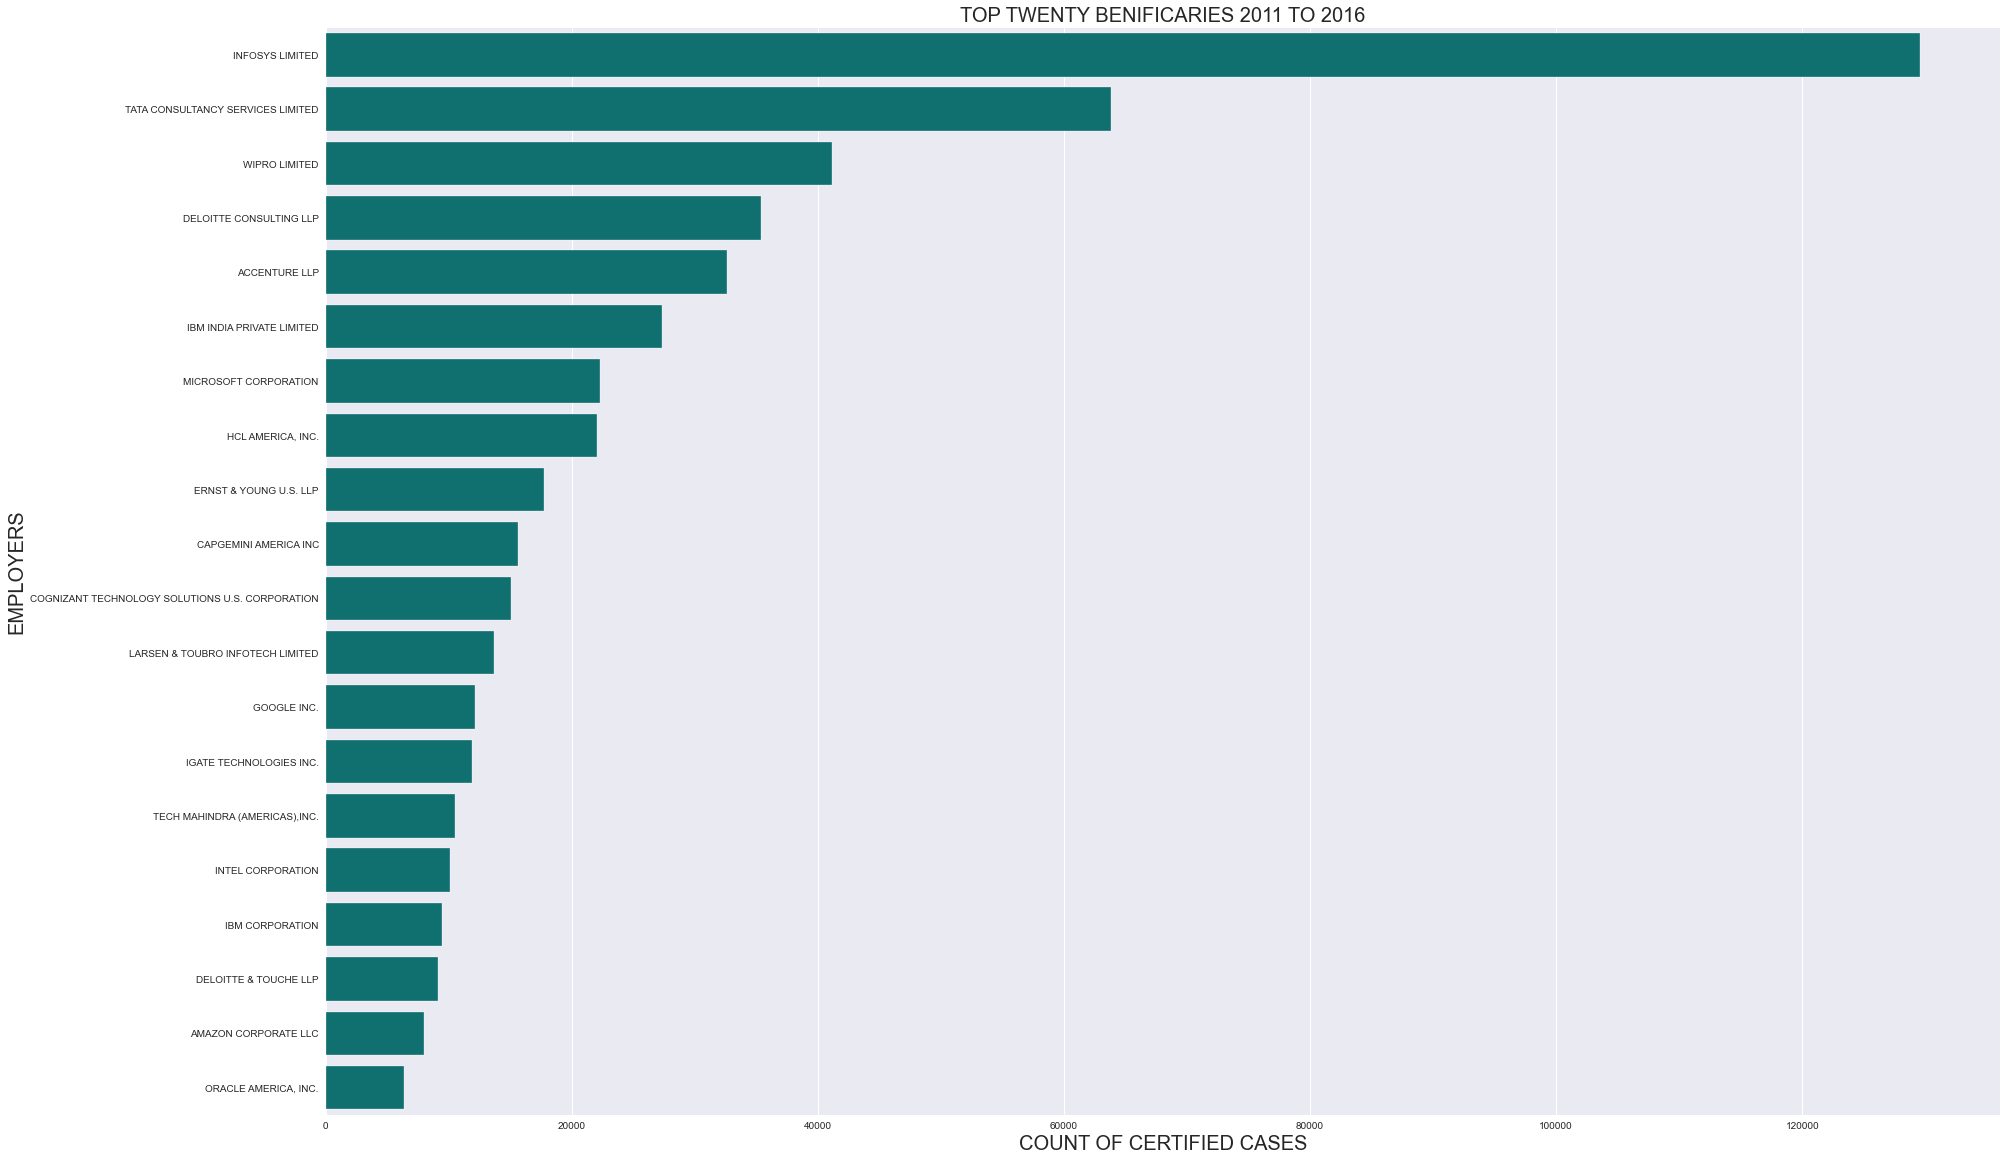

In [268]:
plt.figure(figsize=(30,20))
sns.barplot(x=top_twenty.values,y=top_twenty.index,color='teal')
plt.xlabel('COUNT OF CERTIFIED CASES',size=20)
plt.ylabel('EMPLOYERS', size=20)
plt.title('TOP TWENTY BENIFICARIES 2011 TO 2016',size=20)
plt.show()

- We also take  the top 5 benificaries of H1B and see how their salary is distributed

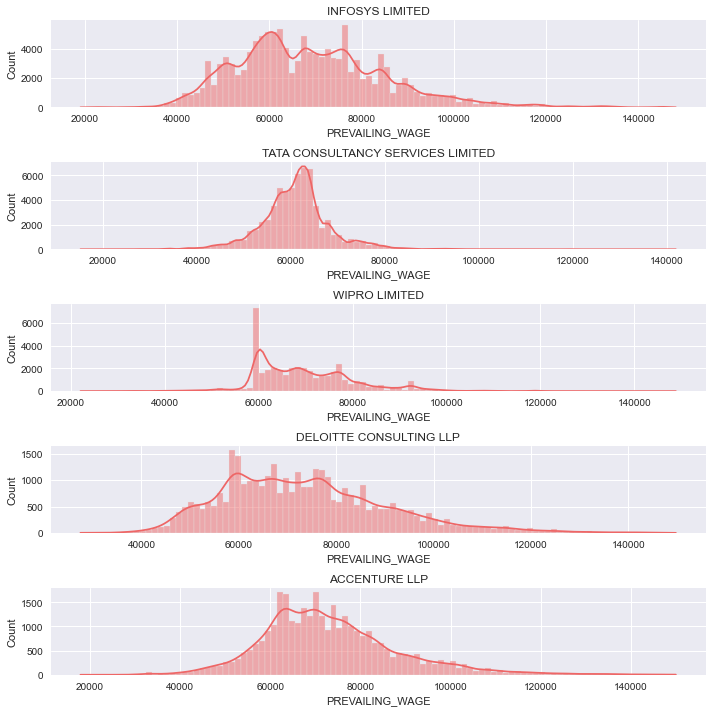

In [269]:
f,axes = plt.subplots(nrows=5,ncols=1, figsize=(10,10),sharey=False)
rowcount=0
companies = top_twenty.index[:5]
for company in companies:
    axes[rowcount].set_title(company)
    wage = certified_cases[certified_cases['EMPLOYER_NAME']==company]['PREVAILING_WAGE']
    sns.histplot(data=wage ,ax=axes[rowcount],bins=100,edgecolor='#E6E6E6', color='#EE6666', kde=True)
    rowcount+=1
    
plt.tight_layout()
   
    

### What are the top roles and What roles get highest pay ###

Below 2 graphs demoonstrates which are the top job benificaries and high paying jobs from 2011 to 2016

Text(0.5, 1.0, 'TOP JOB BENIFICARIES 2011 TO 2016')

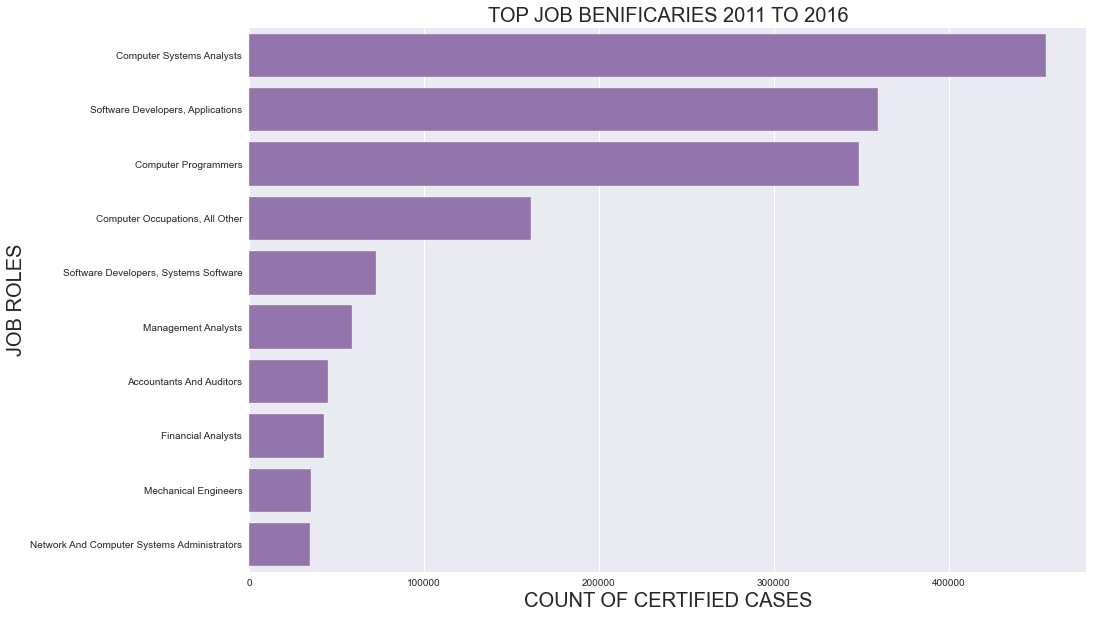

In [270]:
top_roles = certified_cases['SOC_NAME'].value_counts().head(10)
plt.figure(figsize=(15,10))
sns.barplot(y = top_roles.index ,x = top_roles.values ,color='m')
plt.xlabel('COUNT OF CERTIFIED CASES',size=20)
plt.ylabel('JOB ROLES', size=20)
plt.title('TOP JOB BENIFICARIES 2011 TO 2016',size=20)

(120000.0, 145000.0)

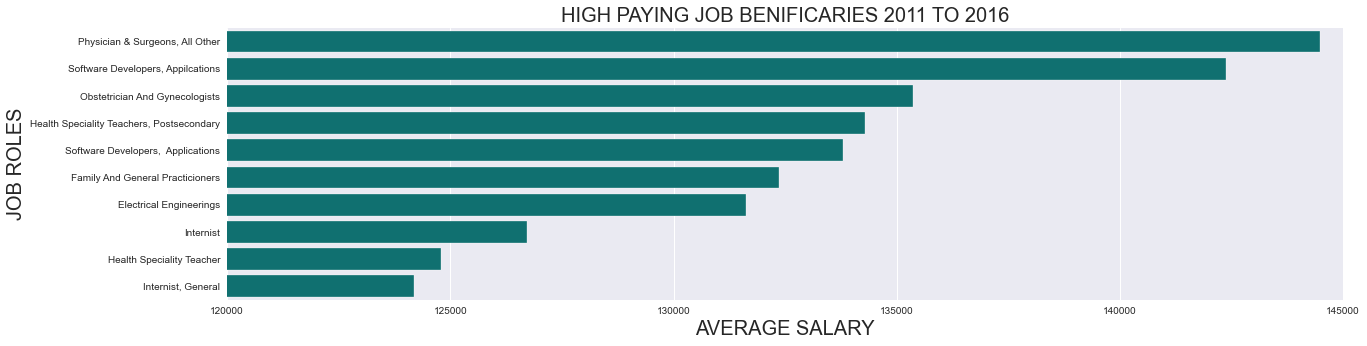

In [271]:
top_payers = certified_cases.groupby(by=['SOC_NAME'])['PREVAILING_WAGE'].mean()
top_payers = top_payers.sort_values(ascending=False)[:10]
plt.figure(figsize=(20,5))
sns.barplot(y = top_payers.index ,x = top_payers.values ,color='teal')
plt.xlabel('AVERAGE SALARY',size=20)
plt.ylabel('JOB ROLES', size=20)
plt.title('HIGH PAYING JOB BENIFICARIES 2011 TO 2016',size=20)
plt.xlim((120000,145000))

### How does Full time Employee fare against Part timers over the Years ? ###


IN 2016 partime employees earned significantly lower

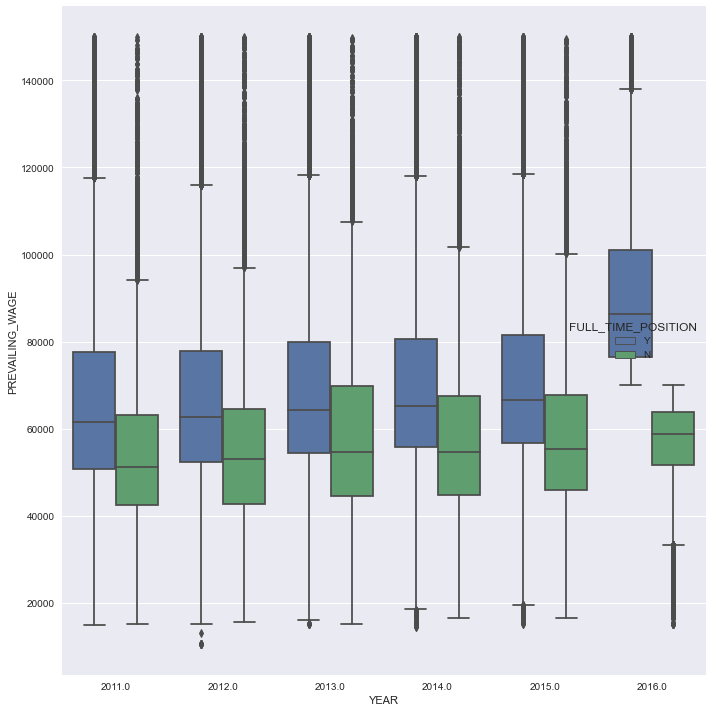

In [272]:
plt.figure(figsize=(10,10))
sns.boxplot(data=certified_cases, x='YEAR', y='PREVAILING_WAGE',hue='FULL_TIME_POSITION')
plt.tight_layout()

## How are Data Engineers doing   ?    ##

There is a very good spike in the number of Certified cases for a data Engineer .. Looks like a Promising career

In [273]:
data_eng =df[df['JOB_TITLE'].str.contains('Data Engineer')].groupby(['YEAR','CASE_STATUS']).count()
data_eng = data_eng.reset_index(level= 'CASE_STATUS')

<AxesSubplot:xlabel='YEAR', ylabel='FULL_TIME_POSITION'>

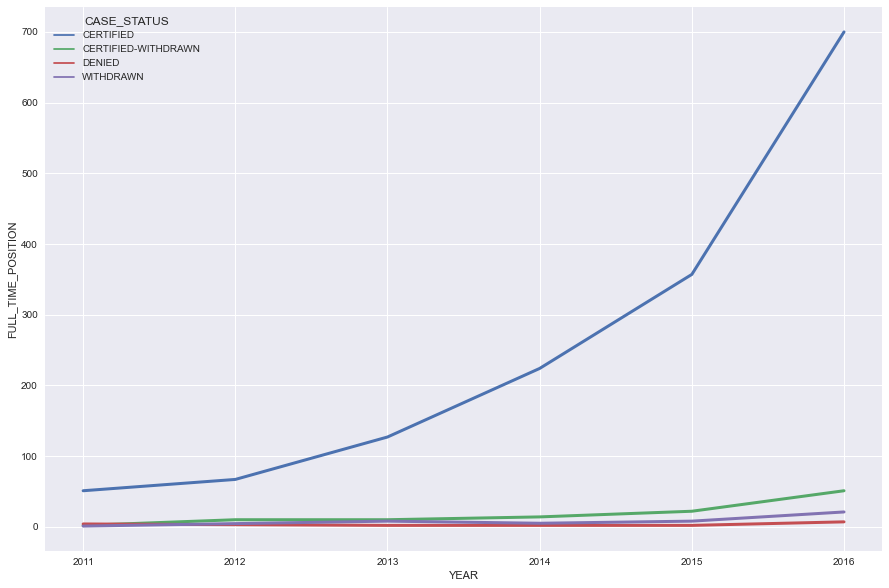

In [274]:
plt.figure(figsize=(15,10))
sns.lineplot(data=data_eng, x= data_eng.index ,y= 'FULL_TIME_POSITION', hue = 'CASE_STATUS', linewidth=3)


## Conclusion ##

These are some of the basic analysis of H1B applications . H1B has always generated good political opinions, data suggests inspite of these there are constant demand and growth
Of course we did not have data to analyse the 'Trump effect' !